In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/data-scientist-salary-in-2024/salaries _2.csv


# 1. Introduction:

> Note: This is my first attempt at performing a hypothesis testing. Any feedback will be greatly appreciated.

This dataset serves as a valuable resource for conducting in-depth analysis and research on data scientist salaries and employment dynamics in the year 2024, providing insights that can inform decision-making and strategy development in the field of data science.



### Dataset Disctionary:

* work_year: The year in which the data was collected (2024 in this case).
* experience_level: The experience level of the employee, typically categorized as entry-level (EL), mid-level (MI), or senior-level (SL),Executive-level / Director(EX).
* employment_type: The type of employment, such as full-time (FT), part-time (PT), contract (C), or freelance (F).
* job_title: The title or role of the employee within the company, for example, Data Scientist.
* salary: The salary of the employee in the local currency (e.g., 120,000 AUD).
* salary_currency: The currency in which the salary is denominated (e.g., USD or AUD).
* salary_in_usd: The salary converted to US dollars for standardization purposes.
* employee_residence: The country of residence of the employee.
* remote_ratio: The ratio indicating the extent of remote work allowed in the position (0 for no remote work, 1 for fully remote).
* company_location: The location of the company where the employee is employed.
* company_size: The size of the company, often categorized by the number of employees (S for small, M for medium, L for large).

> (The introduction was taken from the original dataset page)

# 2. Analysis & Visualization

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/kaggle/input/data-scientist-salary-in-2024/salaries _2.csv')

In [4]:
data.sample(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
7619,2023,EN,FT,Data Scientist,110000,USD,110000,US,0,US,M
15375,2022,SE,FT,Data Scientist,130000,USD,130000,US,100,US,M
14395,2023,SE,FT,Data Scientist,130000,USD,130000,US,100,US,M
8171,2023,SE,FT,Data Analyst,131712,USD,131712,US,0,US,M
15971,2022,MI,FT,Data Engineer,60000,EUR,63040,ES,100,ES,M
1878,2024,SE,FT,Data Scientist,220000,USD,220000,US,0,US,M
884,2024,MI,FT,Data Scientist,170000,USD,170000,US,100,US,M
15213,2022,SE,FT,Data Scientist,104000,USD,104000,US,100,US,M
5372,2024,MI,FT,Data Operations Associate,60000,EUR,66666,DE,0,DE,M
12893,2023,SE,FT,Data Engineer,179170,USD,179170,US,0,US,M


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16494 entries, 0 to 16493
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16494 non-null  int64 
 1   experience_level    16494 non-null  object
 2   employment_type     16494 non-null  object
 3   job_title           16494 non-null  object
 4   salary              16494 non-null  int64 
 5   salary_currency     16494 non-null  object
 6   salary_in_usd       16494 non-null  int64 
 7   employee_residence  16494 non-null  object
 8   remote_ratio        16494 non-null  int64 
 9   company_location    16494 non-null  object
 10  company_size        16494 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,16494.0,2023.224991,0.713405,2020.0,2023.0,2023.0,2024.00,2024.0
salary,16494.0,163787.809628,340601.702339,14000.0,102000.0,142200.0,187342.25,30400000.0
salary_in_usd,16494.0,149713.575725,68516.136918,15000.0,101517.5,141300.0,185900.00,800000.0
remote_ratio,16494.0,32.044986,46.260201,0.0,0.0,0.0,100.00,100.0


In [7]:
print(f'This dataset has {data.shape[0]} rows and {data.shape[1]} columns')

This dataset has 16494 rows and 11 columns


In [8]:
print('numerical features: ', (data.select_dtypes(include=np.number).columns), '\n\n\n')
print('categorical features: ', (data.select_dtypes(exclude=np.number).columns))


numerical features:  Index(['work_year', 'salary', 'salary_in_usd', 'remote_ratio'], dtype='object') 



categorical features:  Index(['experience_level', 'employment_type', 'job_title', 'salary_currency',
       'employee_residence', 'company_location', 'company_size'],
      dtype='object')


In [9]:
#convert the data types to what they're supposed to be
data['work_year'] = pd.to_datetime(data['work_year'], format='%Y')
data['work_year'] = data['work_year'].dt.year
data['work_year'] = data['work_year'].astype(str)

In [10]:
#remote_ratio is a categorical feature
data['remote_ratio'] = data['remote_ratio'].apply(lambda x: x / 100 if x > 0 else x).astype(str)

# 3. Data Cleaning

In [11]:
data.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

The dataset is clean. We'll proceed.

## 1-Univariate Analysis

* i. Salary

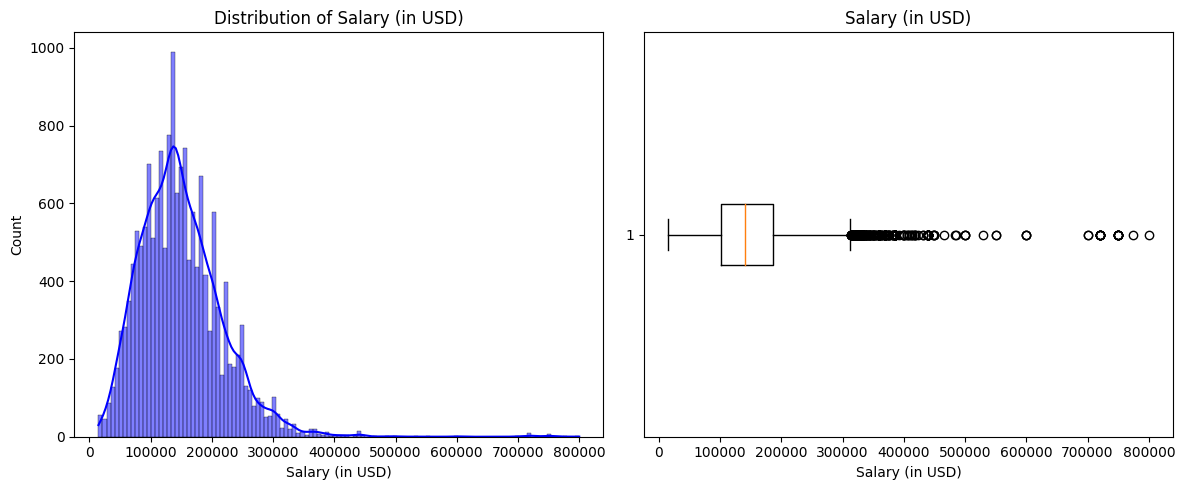

In [12]:
fig, ax= plt.subplots(1, 2, figsize=(12,5))

#hitogram
sns.histplot(data['salary_in_usd'], color='blue', kde=True, ax=ax[0])
ax[0].set_xlabel('Salary (in USD)')
ax[0].set_ylabel('Count')
ax[0].set_title('Distribution of Salary (in USD)')

# Boxplot
ax[1].boxplot(data['salary_in_usd'], vert=False, whis=1.5)
ax[1].set_xlabel('Salary (in USD)')
ax[1].set_title('Salary (in USD)')

plt.tight_layout() 
plt.show()

In [13]:
Q1 = data['salary_in_usd'].quantile(0.25)
Q3 = data['salary_in_usd'].quantile(0.75)
print('most people in the data scientist field generally make around: ', Q1, '-', Q3, '(in USD)' )

most people in the data scientist field generally make around:  101517.5 - 185900.0 (in USD)


Write a function for efficiency and to save time.

In [14]:
'''
    given a df and a column name, this function outputs a summary indicating the unique values in 
    that column and the number of time they've occured. Using that data, it generates a pie chart.
    
    i only use this function for columns that have a max of 4 categories in it 
    and for those that have more than 4 but are distributed properly.
    
    '''

def pie_chart(df, col):
    
    pie_data = df.groupby(col).size().reset_index(name='count').sort_values(by=['count'],ascending=False)
    cleaned = col.replace('_',' ')
    
    

    plt.figure(figsize=(8, 8))
    colors = sns.color_palette('pastel')[0:5]
    piechart = plt.pie(pie_data['count'], labels=pie_data[col], autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(f'Distribution of {cleaned}', fontsize=16, fontweight='bold')
    plt.show()
    
    return display(pie_data, piechart)
    

* ii. Experience level

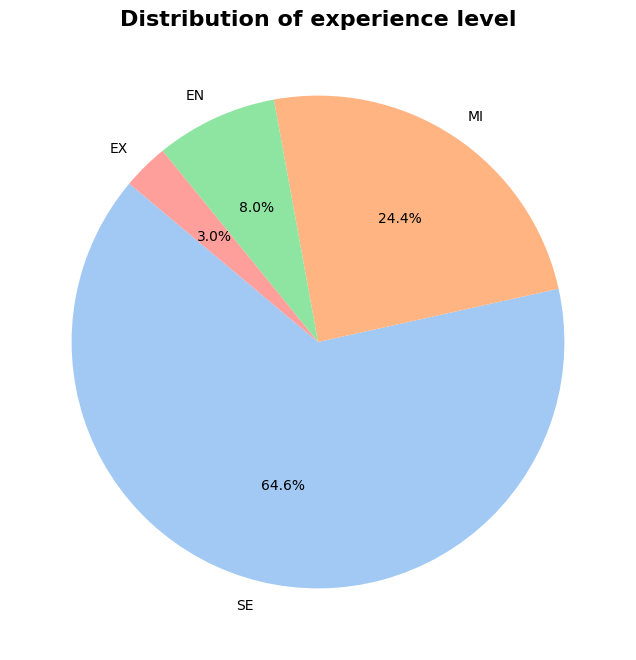

,experience_level,count
3,SE,10652
2,MI,4024
0,EN,1319
1,EX,499


([<matplotlib.patches.Wedge at 0x7be8f2c0f580>,
 [Text(-0.261530776516381, -1.0684576046501513, 'SE'),
  Text(0.6086352658165716, 0.9162767667055579, 'MI'),
  Text(-0.4599057026140912, 0.9992430858920363, 'EN'),
  Text(-0.7717445758243465, 0.7838432940873448, 'EX')],
 [Text(-0.1426531508271169, -0.5827950570819006, '64.6%'),
  Text(0.3319828722635844, 0.4997873272939406, '24.4%'),
  Text(-0.2508576559713224, 0.5450416832138378, '8.0%'),
  Text(-0.4209515868132799, 0.4275508876840062, '3.0%')])

In [15]:
pie_chart(data, 'experience_level')

#### Observation:
* Most data scientists in this dataset fall into the senior category followed by middle position

* iii. Company size

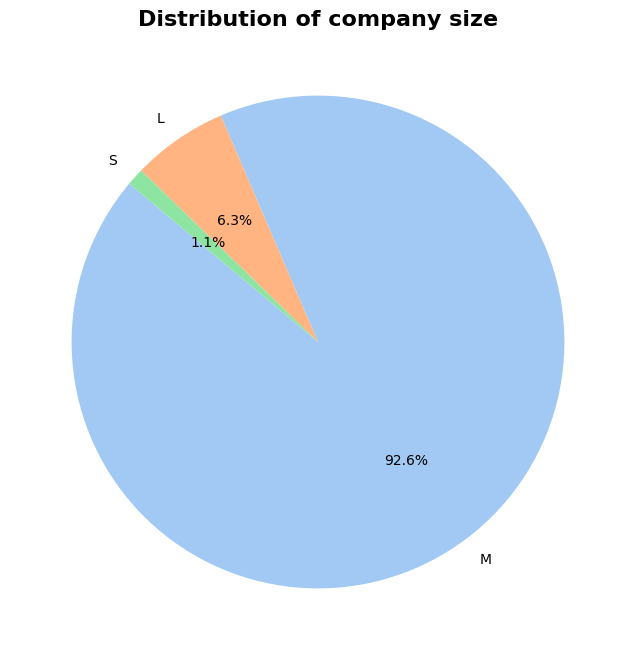

,company_size,count
1,M,15268
0,L,1038
2,S,188


([<matplotlib.patches.Wedge at 0x7be8ee3bb430>,
 [Text(0.6561647392405544, -0.8828634294030847, 'M'),
  Text(-0.6241372539643497, 0.9057884345772146, 'L'),
  Text(-0.8167955312164925, 0.7367801980134698, 'S')],
 [Text(0.35790803958575695, -0.48156187058350064, '92.6%'),
  Text(-0.34043850216237254, 0.4940664188602988, '6.3%'),
  Text(-0.4455248352089959, 0.40188010800734714, '1.1%')])

In [16]:
pie_chart(data, 'company_size')

#### Observation:
* Most companies here are middle sized

* iv. Remote ratio

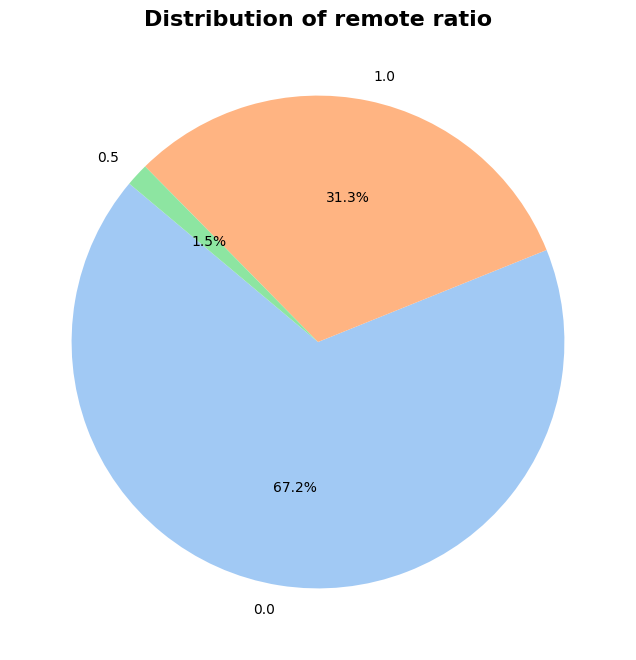

,remote_ratio,count
0,0.0,11084
2,1.0,5161
1,0.5,249


([<matplotlib.patches.Wedge at 0x7be8edfe28f0>,
 [Text(-0.17282967778760622, -1.086337839935548, '0.0'),
  Text(0.22413737728001562, 1.0769226695106924, '1.0'),
  Text(-0.8081802543958672, 0.7462202599800087, '0.5')],
 [Text(-0.09427073333869429, -0.592547912692117, '67.2%'),
  Text(0.12225675124364487, 0.5874123651876504, '31.3%'),
  Text(-0.44082559330683657, 0.40702923271636837, '1.5%')])

In [17]:
pie_chart(data, 'remote_ratio')

#### Observation:
* Only almost half the data scientists work remotely in comparison to the majority population that work on-site

In [18]:
'''
    given a df and a column name, this function generates a countplot with their exact number
    of occurences on top of the bar
    
'''
    


def count_plot(df, col):
    cleaned = col.replace('_',' ')

    plt.figure(figsize=(8, 8))
    plot = sns.countplot(data=df, x=col,palette='viridis')
    for p in plot.patches:
        
        plot.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() /
                                               2, p.get_height()), ha="center", va="bottom", fontsize=9)

    plt.title(f'Distribution of {cleaned}', fontsize=16, fontweight='bold')
    plt.xticks(rotation=45)
    plt.show()
    
    return display(plot)
    
    
    

* v. Salary currency

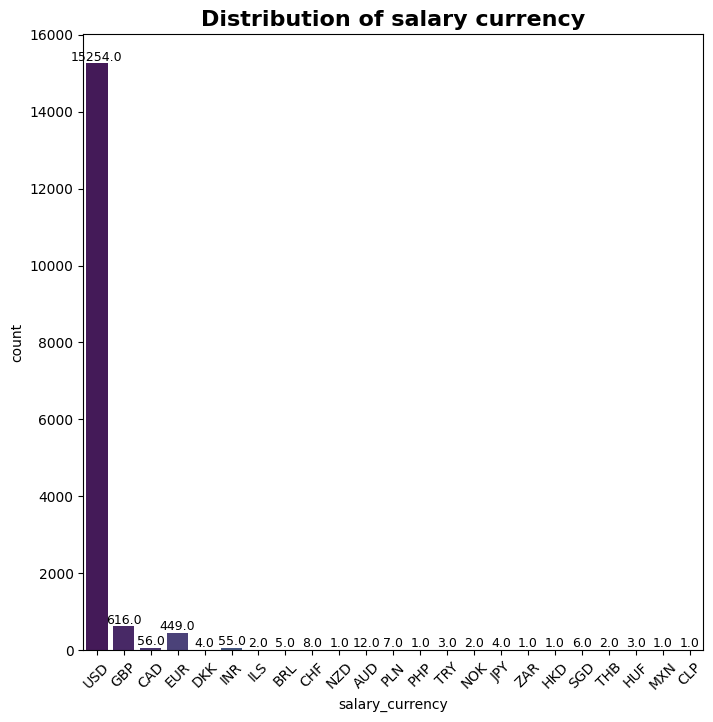

<Axes: title={'center': 'Distribution of salary currency'}, xlabel='salary_currency', ylabel='count'>

In [19]:
count_plot(data,'salary_currency')

#### Observation:
* USD currency is mostly preferred

* vi. Employement Type

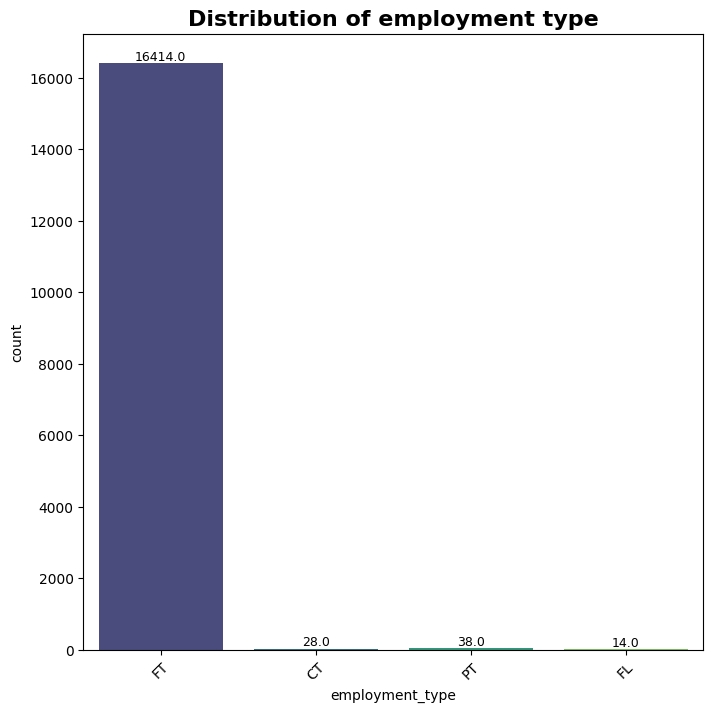

<Axes: title={'center': 'Distribution of employment type'}, xlabel='employment_type', ylabel='count'>

In [20]:
count_plot(data, 'employment_type')

## 2-Bivariate and Multivariate 

### i. Salary based on job title

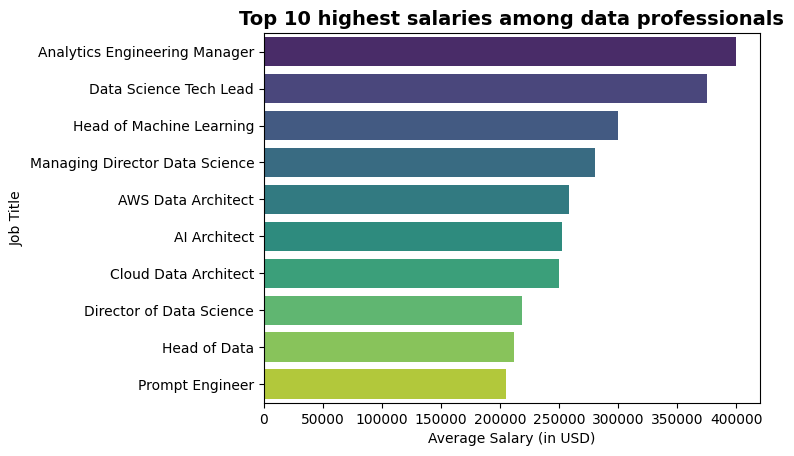

In [21]:
top_ten = data.groupby('job_title')['salary_in_usd'].agg('mean').sort_values(ascending=False).reset_index(name='mean_salary')[:10]
sns.barplot(data=top_ten, y='job_title', x='mean_salary',palette='viridis')
plt.ylabel('Job Title')
plt.xlabel('Average Salary (in USD)')
plt.title('Top 10 highest salaries among data professionals', fontsize=14, fontweight='bold')
plt.show()

## ii. Salary based on experience level

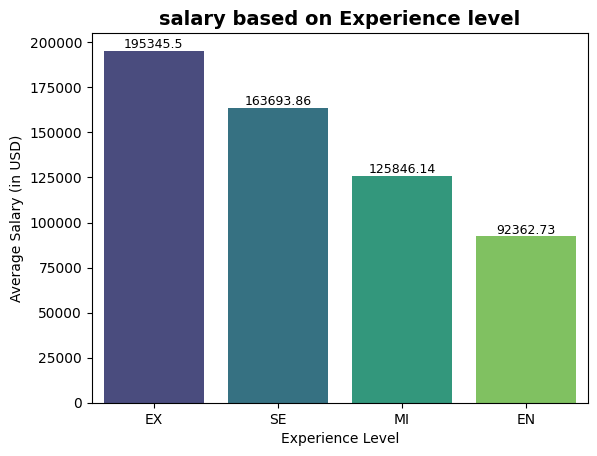

In [22]:
top_ten_exp = data.groupby('experience_level')['salary_in_usd'].agg('mean').sort_values(ascending=False).reset_index(name='mean_salary')
top_ten_exp['mean_salary'] = top_ten_exp['mean_salary'].round(2)
plot = sns.barplot(data=top_ten_exp, x='experience_level', y='mean_salary',palette='viridis')

for p in plot.patches:
    plot.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() /
                                           2, p.get_height()), ha="center", va="bottom", fontsize=9)

plt.xlabel('Experience Level')
plt.ylabel('Average Salary (in USD)')
plt.title('salary based on Experience level', fontsize=14, fontweight='bold')
plt.show()

The executive directors have the higest salary, understandably so. Also they're the fewest in number. 

Let's dig further:
* Where are most Excutive/directors working?
* Are they working remotely or on site?


In [23]:
ex = data[data['experience_level'] == 'EX']

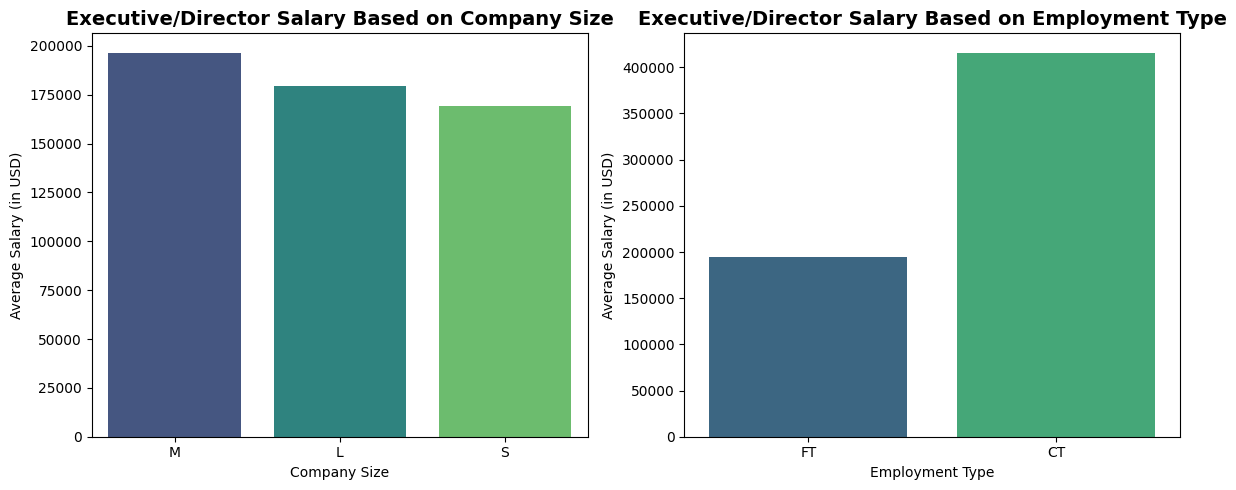

In [24]:
fig, ax= plt.subplots(1,2, figsize=(12,5))

#Barplot for Company Size
sns.barplot(data=ex, x='company_size', y='salary_in_usd', palette='viridis', errorbar=None, ax=ax[0])
ax[0].set_xlabel('Company Size')
ax[0].set_ylabel('Average Salary (in USD)')
ax[0].set_title('Executive/Director Salary Based on Company Size', fontsize=14, fontweight='bold')

# Barplot for employment type
sns.barplot(data=ex, x='employment_type', y='salary_in_usd', palette='viridis', errorbar=None, ax=ax[1])
ax[1].set_xlabel('Employment Type')
ax[1].set_ylabel('Average Salary (in USD)')
ax[1].set_title('Executive/Director Salary Based on Employment Type', fontsize=14, fontweight='bold')

plt.tight_layout()  
plt.show()


They recide mostly in Medium and large sized companies and are on contracts.

## iii. Salary based on employement type

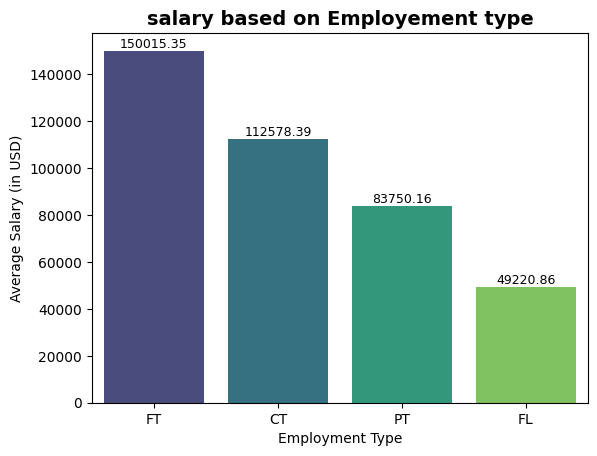

In [25]:
top_ten_exp = data.groupby('employment_type')['salary_in_usd'].agg('mean').sort_values(ascending=False).reset_index(name='mean_salary')
top_ten_exp['mean_salary'] = top_ten_exp['mean_salary'].round(2)
plot = sns.barplot(data=top_ten_exp, x='employment_type', y='mean_salary',palette='viridis')

for p in plot.patches:
    plot.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() /
                                           2, p.get_height()), ha="center", va="bottom", fontsize=9)

plt.xlabel('Employment Type')
plt.ylabel('Average Salary (in USD)')
plt.title('salary based on Employement type', fontsize=14, fontweight='bold')
plt.show()

Full time professionals make the highest.

## iv. Salary based on remote ratio

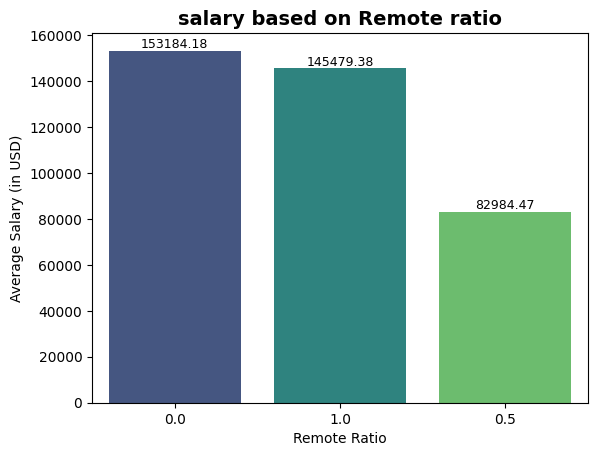

In [26]:
top_ten_exp = data.groupby('remote_ratio')['salary_in_usd'].agg('mean').sort_values(ascending=False).reset_index(name='mean_salary')
top_ten_exp['mean_salary'] = top_ten_exp['mean_salary'].round(2)
plot = sns.barplot(data=top_ten_exp, x='remote_ratio', y='mean_salary',palette='viridis')

for p in plot.patches:
    plot.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() /
                                           2, p.get_height()), ha="center", va="bottom", fontsize=9)

plt.xlabel('Remote Ratio')
plt.ylabel('Average Salary (in USD)')
plt.title('salary based on Remote ratio', fontsize=14, fontweight='bold')
plt.show()

Let's perform a hypothesis test on this observation later in the notebook.

## v. Salary based on company size

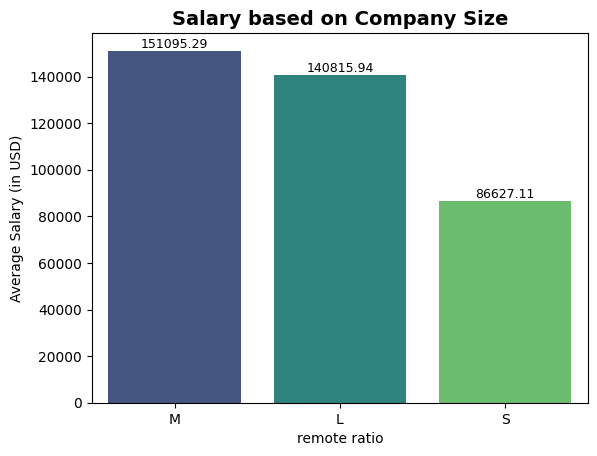

In [27]:
top_ten_exp = data.groupby('company_size')['salary_in_usd'].agg('mean').sort_values(ascending=False).reset_index(name='mean_salary')
top_ten_exp['mean_salary'] = top_ten_exp['mean_salary'].round(2)
plot = sns.barplot(data=top_ten_exp, x='company_size', y='mean_salary',palette='viridis')

for p in plot.patches:
    plot.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() /
                                           2, p.get_height()), ha="center", va="bottom", fontsize=9)

plt.xlabel('remote ratio')
plt.ylabel('Average Salary (in USD)')
plt.title('Salary based on Company Size', fontsize=14, fontweight='bold')
plt.show()

Now this is interesting: Medium sized companies pay their data professionals more than large sized companies.

# 4. Hypothesis Testing (non-parametric test)

Steps to take:
- [x] plot for probability distributions
- [x] use IQR method to remove outliers
- [x] make box plot to visualize cleaned samples
- [x] check for normality using Shapiro-wilk test
- [x] propose null and alternative hypothesis
- [x] perform test (parametric or non parametric)
- [x] conclude

In [28]:
#prepare data
non_remote = data.loc[data['remote_ratio'] == '0.0', ['remote_ratio','salary_in_usd']]
remote = data.loc[data['remote_ratio'] == '1.0', ['remote_ratio','salary_in_usd']]

In [29]:
#import relevant libraries
import scipy.stats as sc 
import statsmodels.graphics.gofplots as sm 

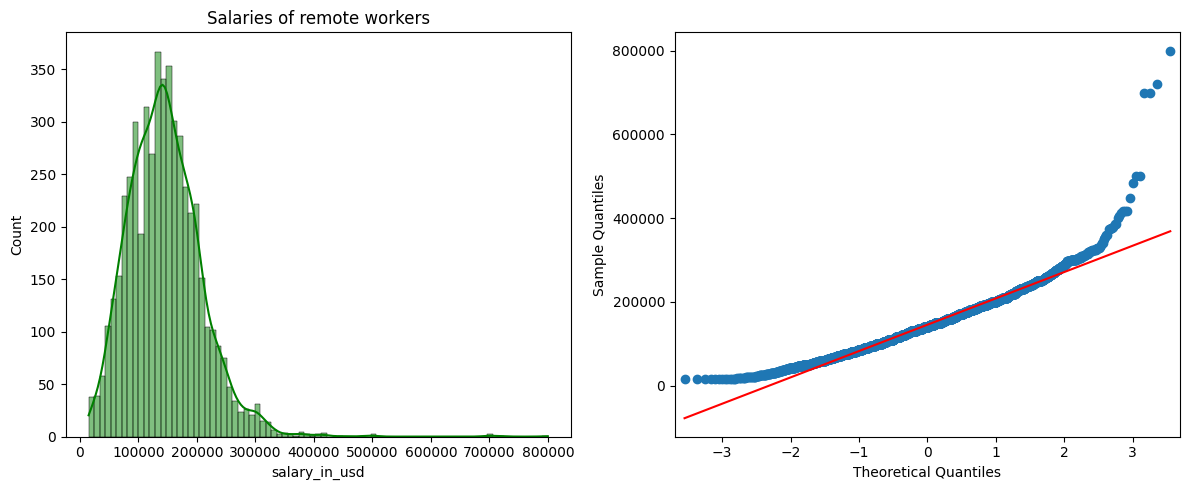

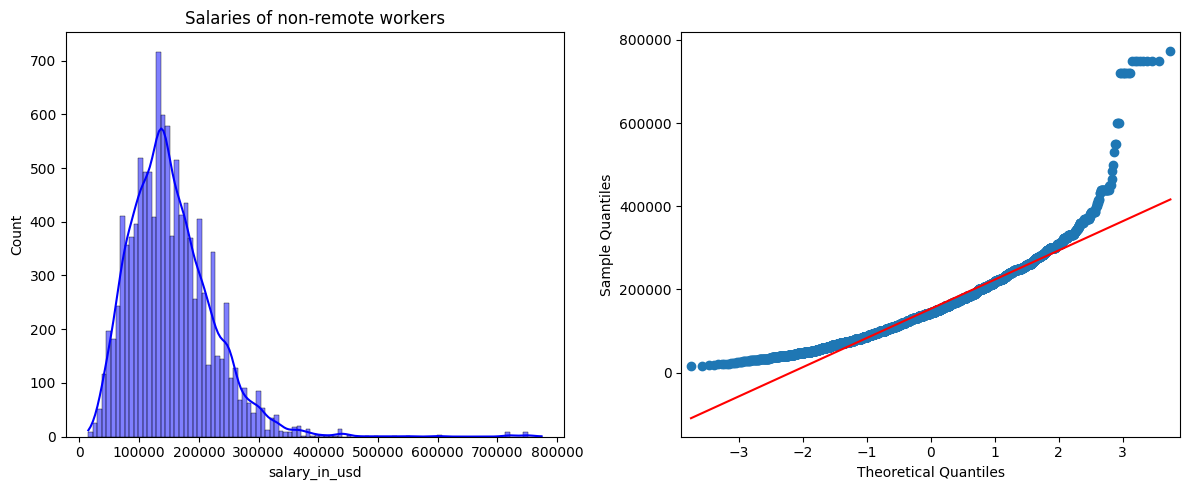

In [30]:
#plot probability distribution graphs

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(remote['salary_in_usd'], color='green', kde=True, ax=ax[0])
ax[0].set_title('Salaries of remote workers')
sm.ProbPlot(remote['salary_in_usd']).qqplot(line='s', color='green', ax=ax[1]) 
plt.tight_layout()


fig, ax = plt.subplots(1, 2, figsize=(12, 5)) 

sns.histplot(non_remote['salary_in_usd'],kde=True, color ='blue',ax=ax[0]) 
ax[0].set_title('Salaries of non-remote workers')
sm.ProbPlot(non_remote['salary_in_usd']).qqplot(line='s', ax=ax[1]) 

plt.tight_layout()
plt.show()

Both the samples are right skewed. The outliers need to be dealt with.

In [31]:
#deal with outliers

def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

In [32]:
#cleaned samples 
cleaned_remote = remove_outliers_iqr(remote['salary_in_usd']).reset_index(name='salary_in_usd').drop('index', axis=1)
cleaned_non_remote = remove_outliers_iqr(non_remote['salary_in_usd']).reset_index(name='salary_in_usd').drop('index', axis=1)

Text(0.5, 1.0, 'Salaries of non remote workers (outliers removed)')

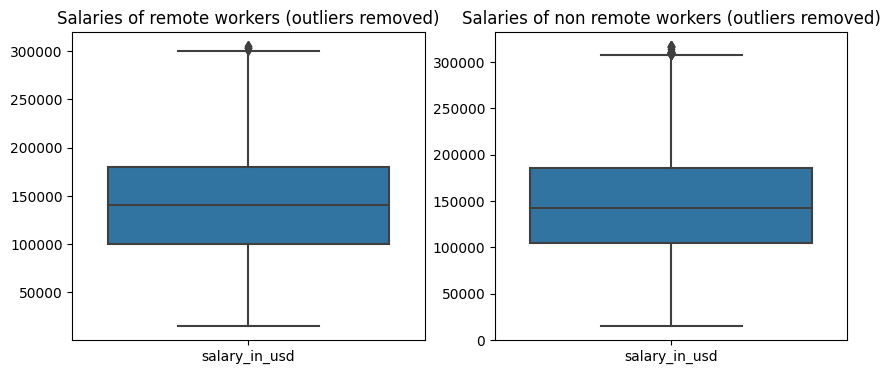

In [33]:
#visualize the cleaned samples
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(cleaned_remote, ax=ax[0])
ax[0].set_title('Salaries of remote workers (outliers removed)')

sns.boxplot(cleaned_non_remote, ax=ax[1])
ax[1].set_title('Salaries of non remote workers (outliers removed)')

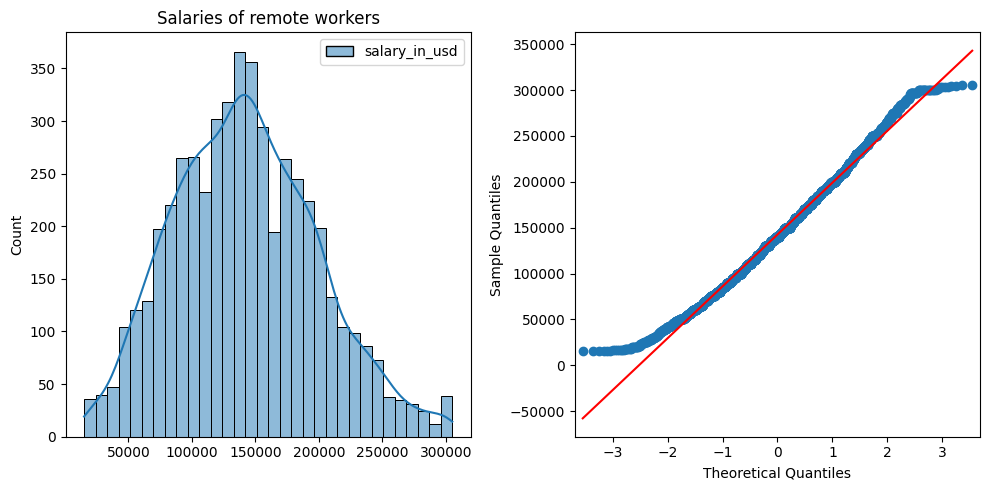

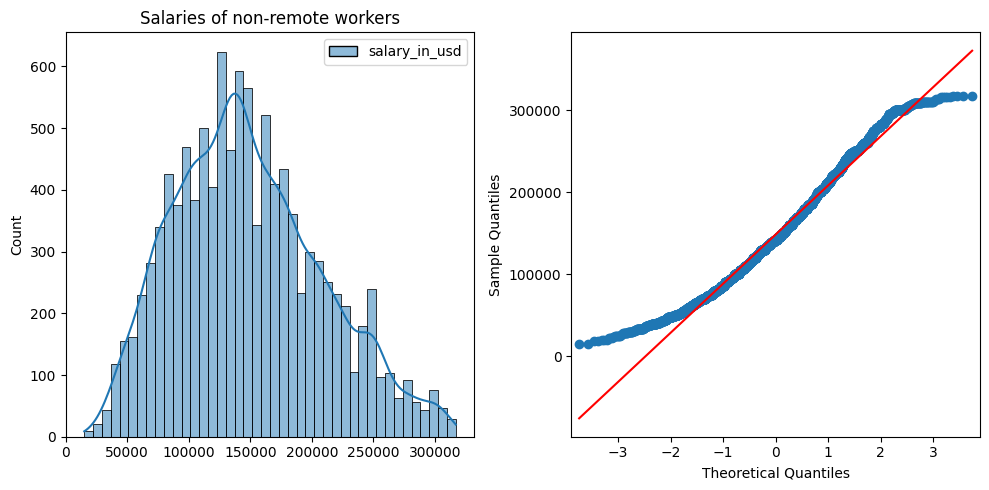

In [34]:
#plot the cleaned samples for their probability distributions
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(cleaned_remote, color='green', kde=True, ax=ax[0])
ax[0].set_title('Salaries of remote workers')
sm.ProbPlot(cleaned_remote['salary_in_usd']).qqplot(line='s', color='green', ax=ax[1]) 
plt.tight_layout()


fig, ax = plt.subplots(1, 2, figsize=(10, 5)) 

sns.histplot(cleaned_non_remote,kde=True, color ='blue',ax=ax[0]) 
ax[0].set_title('Salaries of non-remote workers')
sm.ProbPlot(cleaned_non_remote['salary_in_usd']).qqplot(line='s', ax=ax[1]) 

plt.tight_layout()
plt.show()

In [35]:
#Shapiro-Wilk Test: check for normality
from scipy.stats import shapiro

def shapiro_test(data, col):
    stat, p = shapiro(data[col])
    print(f'Statistics: {stat:0.2f}, p-value: {p:0.2f}')
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
        #Ho is that distribution is normal
    else:
        print('Sample does not look Gaussian (reject H0)')


In [36]:
shapiro_test(cleaned_remote, 'salary_in_usd')

Statistics: 0.99, p-value: 0.00
Sample does not look Gaussian (reject H0)


In [37]:
shapiro_test(cleaned_non_remote, 'salary_in_usd')

Statistics: 0.98, p-value: 0.00
Sample does not look Gaussian (reject H0)


Both the samples aren't normally distributed and they're both right skewed. Let's go for non parametric test: Mann Whitney U test.

* Null Hypothesis (H0): There is no significant difference in the distribution of salaries between remote and on-site data professionals.
* Alternative Hypothesis (H1): There is a significant difference in the distribution of salaries between remote and on-site data professionals.


In [38]:
#perform non parametric test
from scipy.stats import mannwhitneyu 

def mwhitney_test(data1, data2):
    stat, p = mannwhitneyu(data1, data2)
    print(f'Statistics: {stat:0.2f}, p-value: {p:0.2f}')
    # interpret
    alpha = 0.05
    if p > alpha:
        print('There is no significant difference between the samples. (fail to reject H0)')
        #Ho is there is no difference between the samples.
    else:
        print('There is a significant difference between the samples. (reject H0)')



In [39]:
mwhitney_test(cleaned_remote['salary_in_usd'], cleaned_non_remote['salary_in_usd'])

Statistics: 26483005.00, p-value: 0.00
There is a significant difference between the samples. (reject H0)


#### **conclusion:**
There is a significant difference between the salaries of those data professionals that work on site and those that work remotely.

# 5. Conclusion:

* The data scientists field seems to have quite the outliers when it comes to salary. The people with the most experience get paid the most. The moral is: *continue to grind in this field until you become a bigshot.*
* For the genral public: individuals that work full-time, in a medium sized company and on site receive the heaviest dough.